<a href="https://colab.research.google.com/github/nihemelandu/Demand-Forecasting-Models/blob/main/python-codes/Level_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction Section
"""
# Demand Forecasting Project

## Objective:
This project aims to compare traditional demand forecasting techniques with machine learning models to showcase which model is most suitable for different problem complexities.

We will demonstrate the application of:
- Traditional time series demand forecasting models (Moving Average, exponential smoothing)
- Machine Learning models (Random Forest, XGBoost, LSTM)

The datasets used in this project vary in complexity, and we will analyze how each method performs based on the characteristics of the data.

## Datasets:
1. **Dataset 1**: Simple demand data with no significant trends.
2. **Dataset 2**: Data with some seasonality and trends.
3. **Dataset 3**: Complex data with high volatility and external factors.

The goal is to highlight the trade-offs between traditional methods and more advanced ML techniques in forecasting demand.

"""



In [1]:
import google.colab
google.colab.drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Libraries Section

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series forecasting models
# Exponential Smoothing (Simple Exponential Smoothing)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Deep Learning (LSTM)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For warnings (optional)
import warnings
warnings.filterwarnings("ignore")


# Level Time Series

In [3]:
# Load the dataset for Level Time Series (Inflation Rate)
df_level = pd.read_excel('/content/drive/MyDrive/supply-chain-demand-forecasting-project/inflation_rate.xlsx', parse_dates=['Quarter'])
df_level.head()

,Quarter,Inflation rate (%) (Y)
0,Sep-11,0.6
1,Dec-11,0.0
2,Mar-12,0.1
3,Jun-12,0.5
4,Sep-12,1.4


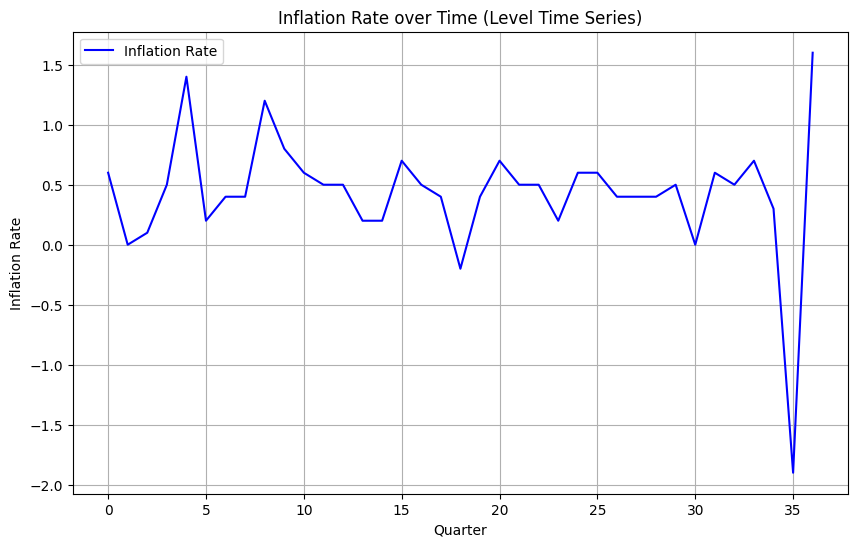

In [4]:
# Plot the data to visualize the level component
plt.figure(figsize=(10, 6))
plt.plot(df_level['Inflation rate (%) (Y)'], label='Inflation Rate', color='b')
plt.title('Inflation Rate over Time (Level Time Series)')
plt.xlabel('Quarter')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()

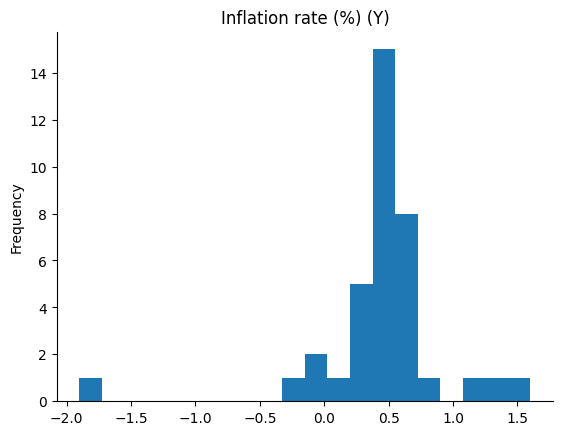

In [5]:
# @title Inflation rate (%) (Y)

from matplotlib import pyplot as plt
df_level['Inflation rate (%) (Y)'].plot(kind='hist', bins=20, title='Inflation rate (%) (Y)')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Fitting Traditional Models on Level Time Series


Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062
Best alpha: 0.1 with MSE: 0.2949599147242062


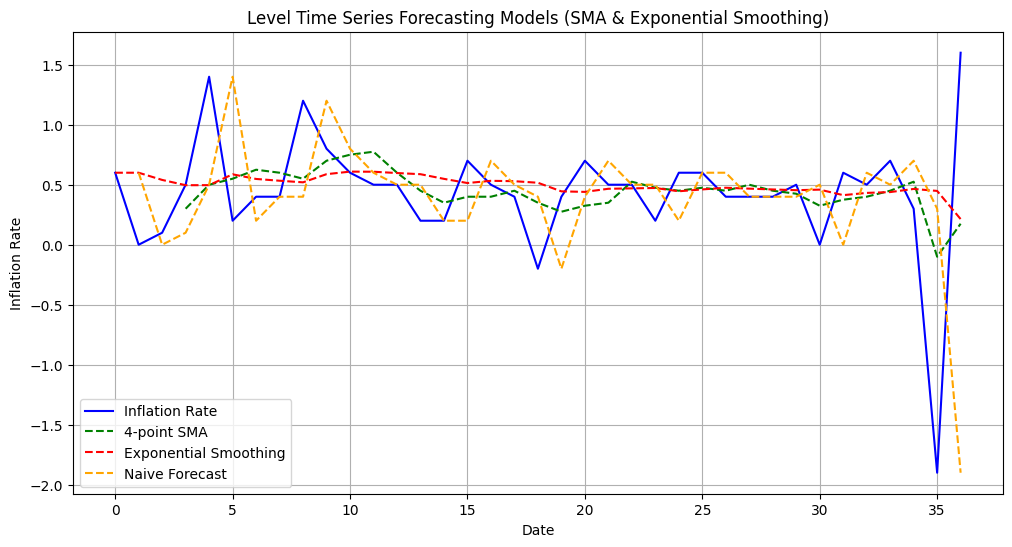

In [28]:
# Simple Moving Average (SMA)
# Define window size (Quartely)
window_size = 4

# Naive Forecasting
df_level['Naive_Forecast'] = df_level['Inflation rate (%) (Y)'].shift(1)

# Calculate Simple Moving Average on training set
df_level['SMA'] = df_level['Inflation rate (%) (Y)'].rolling(window=window_size).mean()

# grid search for alpha - Simple Exponential-Smoothing
# Try different alpha values
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    model_ses = SimpleExpSmoothing(df_level['Inflation rate (%) (Y)'])
    model_ses_fit = model_ses.fit(smoothing_level=alpha, optimized=False)
    predicted = model_ses_fit.fittedvalues
    mse = mean_squared_error(df_level['Inflation rate (%) (Y)'], predicted)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

    print(f"Best alpha: {best_alpha} with MSE: {best_mse}")
    #forecast_ses = model_ses_fit.forecast(len(test_level))

# Apply Exponential Smoothing using optimal alpha
model_ses = SimpleExpSmoothing(df_level['Inflation rate (%) (Y)'])
model_ses_fit = model_ses.fit(smoothing_level=best_alpha, optimized=False)
df_level['SES'] = model_ses_fit.fittedvalues

# Plot the original data, SMA, and Exponential Smoothing forecast
plt.figure(figsize=(12, 6))
plt.plot(df_level['Inflation rate (%) (Y)'], label='Inflation Rate', color='blue')
plt.plot(df_level['SMA'], label=f'{window_size}-point SMA', color='green', linestyle='--')
plt.plot(df_level['SES'], label='Exponential Smoothing', color='red', linestyle='--')
plt.plot(df_level['Naive_Forecast'], label='Naive Forecast', color='orange', linestyle='--')
plt.title('Level Time Series Forecasting Models (SMA & Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()


### Evaluate the Forecast

In [34]:
# Evaluation Metrics: Mean Absolute Error (MAE) and RMSE
def evaluate_forecast(true_values, forecast_values):
    mae = mean_absolute_error(true_values, forecast_values)
    rmse = np.sqrt(mean_squared_error(true_values, forecast_values))
    return mae, rmse

# Model names
models = ['SMA', 'SES', 'Naive Forecast']

# Metrics: MAE and RMSE values for each model
mae_values = []
rmse_values = []

# Evaluate Simple Moving Average (SMA)
df = df_level.loc[~df_level['SMA'].isna()]
mae_sma, rmse_sma = evaluate_forecast(df['Inflation rate (%) (Y)'], df['SMA'])
mae_values.append(mae_sma)
rmse_values.append(rmse_sma)

# Evaluate Exponential Smoothing (SES)
mae_ses, rmse_ses = evaluate_forecast(df_level['Inflation rate (%) (Y)'], df_level['SES'])
mae_values.append(mae_ses)
rmse_values.append(rmse_ses)

# Evaluate Naive Forecast
df = df_level.loc[~df_level['Naive_Forecast'].isna()]
mae_naive, rmse_naive = evaluate_forecast(df['Inflation rate (%) (Y)'], df['Naive_Forecast'])
mae_values.append(mae_naive)
rmse_values.append(rmse_naive)

# Print evaluation metrics
print(f"SMA - MAE: {mae_sma:.4f}, RMSE: {rmse_sma:.4f}")
print(f"SES - MAE: {mae_ses:.4f}, RMSE: {rmse_ses:.4f}")
print(f"Naive Forecast - MAE: {mae_naive:.4f}, RMSE: {rmse_naive:.4f}")


SMA - MAE: 0.3059, RMSE: 0.4838
SES - MAE: 0.3130, RMSE: 0.5431
Naive Forecast - MAE: 0.4500, RMSE: 0.8014


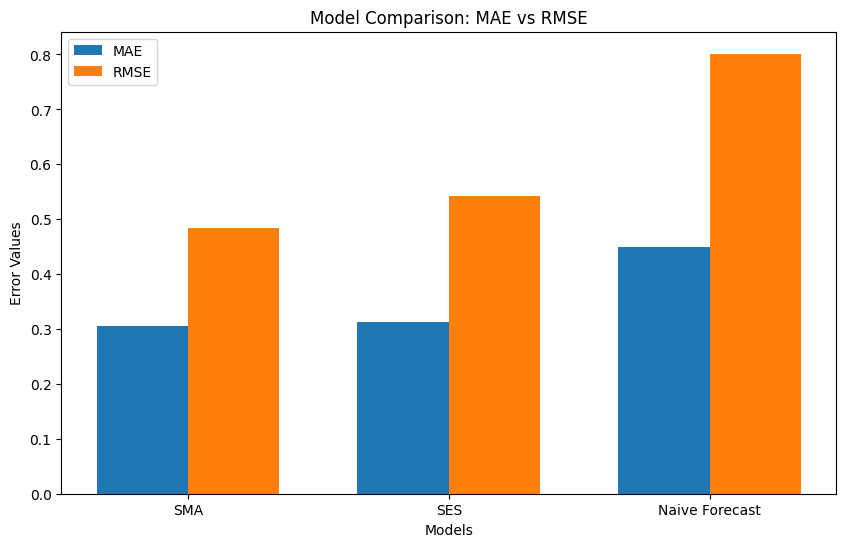

In [35]:
#compare evaluation results using barplots
# X positions for each model
x = np.arange(len(models))

# Bar width for grouping
width = 0.35

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for MAE and RMSE for each model
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Comparison: MAE vs RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


### Train-Test Split for Level Time Series chronologically, training set coming before the test set in terms of time.

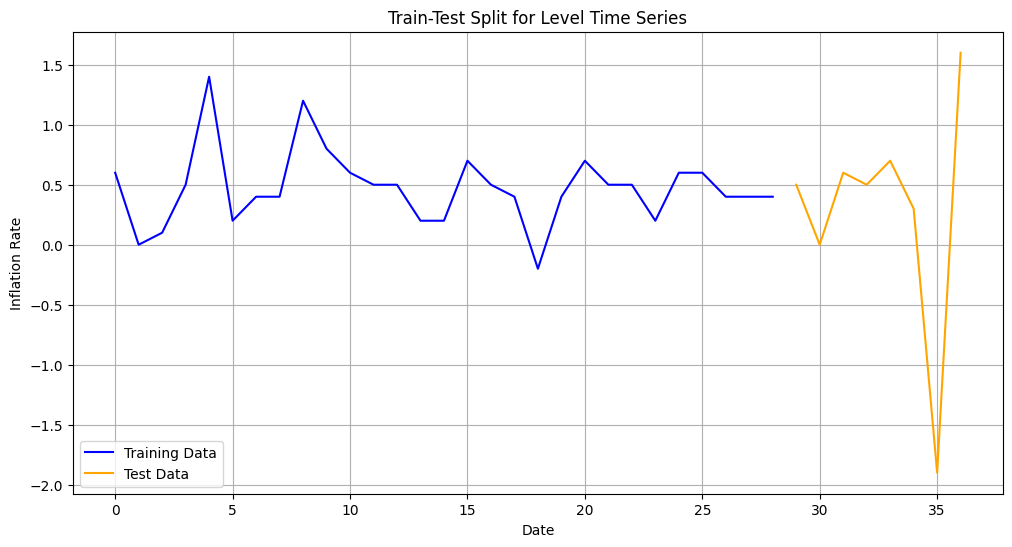

In [7]:
# Split the dataset into train and test sets
train_size = int(len(df_level) * 0.8)  # 80% for training, 20% for testing
train_level, test_level = df_level[:train_size], df_level[train_size:]

# Plot the train and test sets
plt.figure(figsize=(12, 6))
plt.plot(train_level['Inflation rate (%) (Y)'], label='Training Data', color='blue')
plt.plot(test_level['Inflation rate (%) (Y)'], label='Test Data', color='orange')
plt.title('Train-Test Split for Level Time Series')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()


### Forecast on the test dataset